<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch02_04_%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.04 히스토그램

---
* 날짜: 2022-04-18
* 이름: 김민규


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4] 
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
x = np.random.randn(5000) # 표준정규분포
plt.hist(x)
plt.show()
```

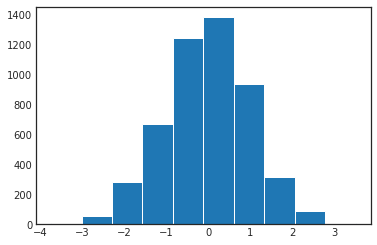

In [ ]:
x = np.random.randn(5000) # 표준정규분포
plt.hist(x) # 막대 그래프와 다르게 x만 표시해줍니다.
plt.show()

#### **| 옵션**

```
plt.hist(data, 
        bins = 구간개수,
        color=색,
        edgecolor=테두리 색, 
        alpha=투명도 (0~1),
        density=정규화 여부 (True/False),
        cumulative=누적여부 (True/Fasle),  
        histtype = 플롯 형식 {'bar', 'barstacked', 'step', 'stepfilled' } default: 'bar'
        label = 레이블,
        align=눈금 위치 {'left', 'mid', 'right'}, default: 'mid'
```

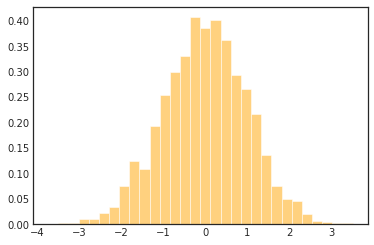

In [ ]:
plt.hist(x,         # density=True는 전체가 1로 놓는, 밀도함수를 이야기합니다.
         bins = 30,
         alpha=0.5,
         color='orange',
         density=True)
plt.show()

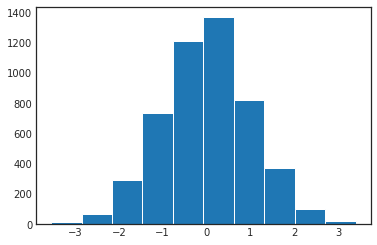

In [ ]:
x2 = np.random.randn(5000) # 표준정규분포
plt.hist(x2) # 막대 그래프와 다르게 x만 표시해줍니다.
plt.show()

#### **| 여러개의 히스토그램**

```
plt.hist([x1,x2, ..])
```

(array([[   7.,   53.,  282.,  673., 1249., 1386.,  936.,  316.,   88.,
           10.],
        [   7.,   53.,  282.,  673., 1249., 1386.,  936.,  316.,   88.,
           10.],
        [   7.,   49.,  248.,  682., 1246., 1424.,  861.,  368.,   98.,
           17.]]),
 array([-3.73771377, -3.01388599, -2.29005821, -1.56623043, -0.84240265,
        -0.11857488,  0.6052529 ,  1.32908068,  2.05290846,  2.77673624,
         3.50056402]),
 <a list of 3 Lists of Patches objects>)

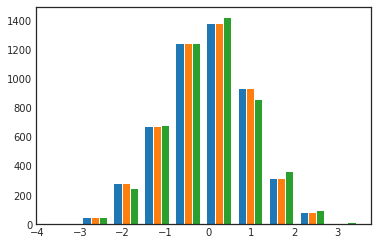

In [ ]:
plt.hist([x,x,x2])

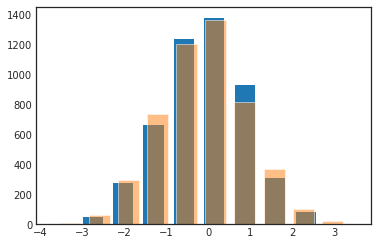

In [ ]:
plt.hist(x, width=0.5)
plt.hist(x2, alpha=0.5,width=0.5)
plt.show()

### (2) Seaborn 으로 그리기



#### **| 기본사용**

```
sns.histplot(x)
```

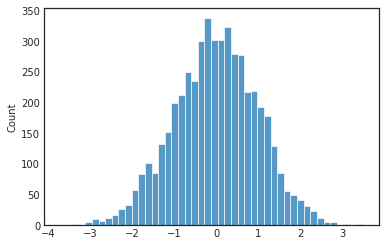

In [ ]:
sns.histplot(x)

#### **| 옵션**

```
seaborn.histplot(data=None, 
                 bins='auto', # 구간개수
                 cumulative=False, # 누적여부
                 element='bars', # 플롯형식 {“bars”, “step”, “poly”},
                 multiple='layer' # 다중데이터 플롯형식{“layer”, “dodge”, “stack”, “fill”},
                 fill=True, # 색칠 여부
                 shrink=1, # 너비 감소
                 kde=False, # kde선
                 color=None, # 색깔
                 log_scale=None # 로그스케일)
```

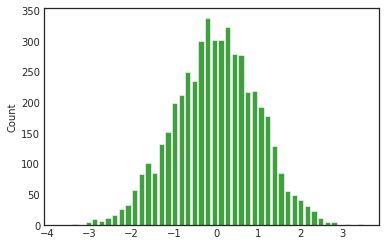

In [ ]:
sns.histplot(x, color='green', shrink=0.8)

#### **| 여러개의 히스토그램**

```
sns.histplot([x1, x2, ...])
```

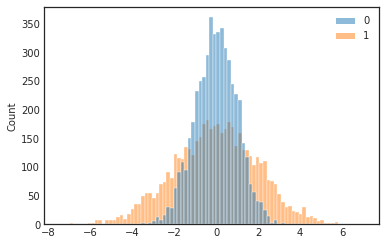

In [ ]:
sns.histplot([x, x*2])

#### **| DataFrame 사용**




* 데이터 프레임을 만들어 줍니다.



In [ ]:
df=pd.DataFrame([x, x*2]).T
df.head()

,0,1
0,0.829597,1.659194
1,0.384538,0.769076
2,0.628326,1.256651
3,-1.625944,-3.251889
4,0.074716,0.149433


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot(kind='hist')
```




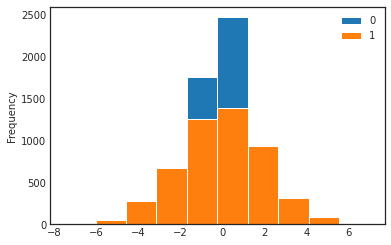

In [ ]:
df.plot(kind='hist')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.histplot(data=df, x=x_column)
```


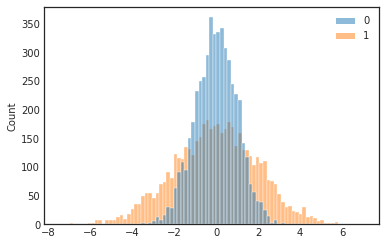

In [ ]:
sns.histplot(df)

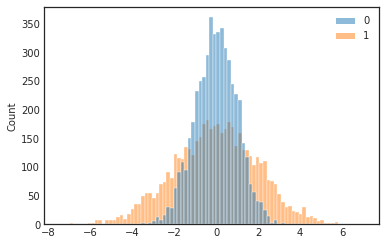

In [ ]:
sns.histplot(data=df)


## **실습**
---


### (1) `plt.hist`의 `histtypes` 옵션비교

```
x1 = np.random.normal(0, 1, 5000)
x2 = np.random.normal(0, 3, 5000)
x3 = np.random.normal(10, 3, 5000)

histtypes=['bar', 'barstacked', 'step', 'stepfilled']

```

In [ ]:
x1 = np.random.normal(0, 1, 5000) # 평균 0, 편차 1 == 표준정규분포
x2 = np.random.normal(0, 3, 5000) # 평균 0, 편차 3
x3 = np.random.normal(10, 3, 5000) # 평균 10, 편차 3

histtypes=['bar', 'barstacked', 'step', 'stepfilled']

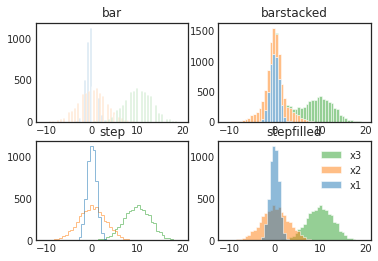

In [ ]:
# 2X2 플롯에 그리기

for i,histtype in enumerate(histtypes): # enumerate는 인덱스 번호로 반복문을 추출합니다.
    plt.subplot(2,2,i+1)    # i가 1부터 시작해야하므로, +1을 붙여줍니다.
    plt.hist([x1,x2,x3], histtype=histtype,
             label= ['x1','x2','x3'],
             alpha=0.5,
             bins=50)
    plt.title(histtype)
plt.legend()

plt.show()

### (2) 객체지향 사용하기


```
fig, ax = plt.subplots(2,2, figsize=size)
```

In [ ]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f466f66d050>,
      dtype=object)

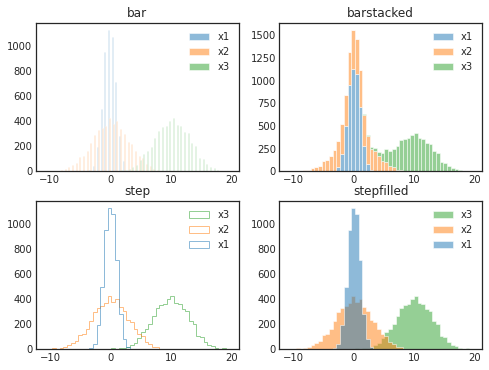

In [ ]:
style=dict(bins=50, alpha=0.5, label=['x1','x2','x3'])
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax = ax.flatten() # 다차원 배열을 1차원 배열로 평평하게 펴주는 함수

for i, histtype in enumerate(histtypes):
  ax[i].hist([x1, x2, x3], histtype=histtype, **style)
  ax[i].set_title(histtype)
  ax[i].legend()
plt.show()

### (3) Iris 데이터 변수별 분포 그리기

```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# 변수이름 / 라벨이름
x_names = iris.feature_names
y_names = iris.target_names
print('x_names : ',x_names)
print('y_names : ',y_names)

x_names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_names :  ['setosa' 'versicolor' 'virginica']


In [ ]:
# 데이터셋
x_data = iris.data
y_data = iris.target
print('x :', x_data.shape)
print('y :', y_data.shape) # (150,) -> (150,1) 

x : (150, 4)
y : (150,)


In [ ]:
y_data # 0,1,2로 ['setosa' 'versicolor' 'virginica']를 표현해줍니다.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

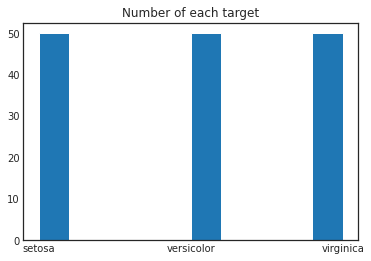

In [ ]:
plt.hist(y_data)
plt.xticks([0,1,2], y_names) # 0,1,2를 y_names로 변경해주었습니다.
plt.title('Number of each target')
plt.show()

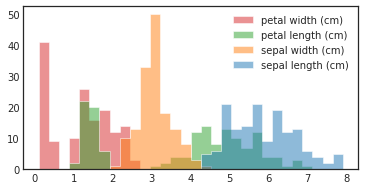

In [ ]:
x_data.shape # 150개가 4개가 들어가있습니다.
plt.figure(figsize=(6,3))
plt.hist(x_data, histtype='stepfilled',
         bins=30,
         alpha=0.5,
         label=x_names)
plt.legend()
plt.show()


## **과제**
---


In [ ]:
# 변수이름 / 라벨이름
x_names = iris.feature_names
y_names = iris.target_names
print('x_names : ',x_names)
print('y_names : ',y_names)

x_names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_names :  ['setosa' 'versicolor' 'virginica']


In [ ]:
# 데이터셋
x_data = iris.data
y_data = iris.target
print('x :', x_data.shape)
print('y :', y_data.shape) # (150,) -> (150,1) 

x : (150, 4)
y : (150,)


플러스과제 : 
* petal끼리 /sepal 끼리 나눠서 그리기
* 2 X 1 에다가 그리기

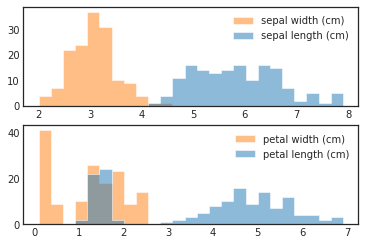

In [ ]:
plt.subplot(211)
plt.hist(x_data[:,:2], histtype='stepfilled', bins=25, alpha=.5, label=x_names[:2])
plt.legend()

plt.subplot(212)
plt.hist(x_data[:,2:], histtype='stepfilled', bins=25, alpha=.5, label=x_names[2:])
plt.legend()
plt.show()

### (1)  지수분포(exponential distribution) 그리기




* 지수분포의 확률밀도 함수는 다음과 같습니다.


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7ae26c8e2d08abfda4102c31e1f380e7fa9068b7)

* 아래와 같이 넘파이 함수를 이용해 확률밀도 함수를 따르는 데이터셋을 얻을 수 있습니다.

```
np.random.exponential(scale=lambda, size=데이터개수)
```

* lambda 값이 각각 `0.5, 1, 2`일 때의 지수분포를 따르는 데이터를 `10000`개씩 뽑고 각 데이터셋의 밀도분포를 그리세요.



* 3개의 데이터셋을 비교하고, lambda 값에 따라 데이터가 어떻게 샘플링 되는지 간단히 설명하세요.

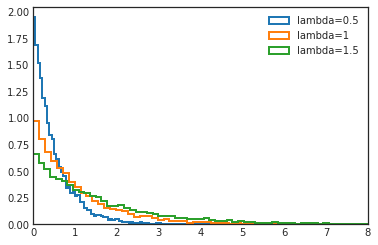

In [ ]:
for scale in [0.5, 1, 1.5]:
  xs = np.random.exponential(scale=scale,size=10000)
  plt.hist(xs, bins=100, histtype='step', density=True, linewidth=2, label=f'lambda={scale}')

plt.legend()
plt.xlim([0,8])
plt.show()

### (2) 캘리포니아 집값 데이터 변수별 분포 그리기



* `/content/sample_data/california_housing_test.csv`을 불러오세요.
* 9개의 변수의 분포를 3 x 3 figure에 `seaborn`을 이용해 그려주세요.
* `kde` 선을 (histplot 옵션 )추가해 주세요.

```
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
```

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


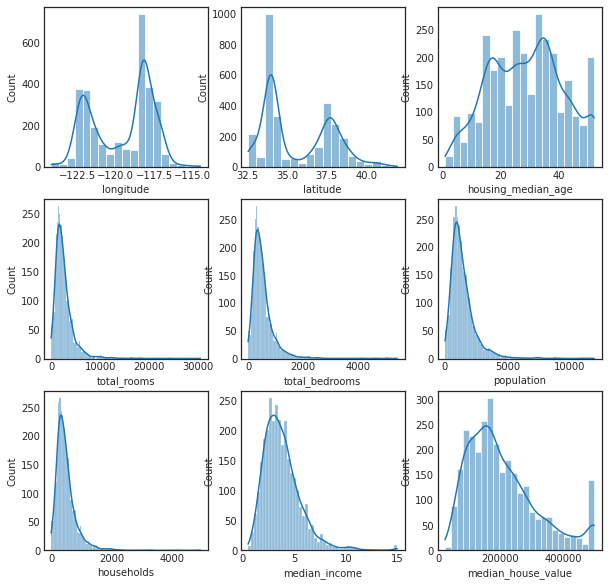

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
plt.rcParams['figure.figsize'] = [10, 10] 
plt.style.use('seaborn-white')
sns.set_style('white')
for i, column in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.histplot(df[column],kde=True)
#plt.show()
#plt.legend()